In [1]:
import pandas as pd
import numpy as np
import json
import ijson
import datetime
from pandas.io.json import json_normalize
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)


# set pandas to display more chars in a column cell
pd.options.display.max_colwidth = 5000

In [4]:
sample_json_df = pd.read_json('Surroundings.json')
sample_json_df.head(3)

store_code  \
0       10055   
1       10077   
2       10079   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [6]:
df_json = sample_json_df.to_json(orient='records')

In [7]:
#Convert json file into a flat table with columns
finaldf = json_normalize(json.loads(df_json), meta=['store_code'], sep="_")

In [8]:
finaldf.head(1)
finaldf.dtypes

store_code                          int64
surroundings_accounting            object
surroundings_airport               object
surroundings_amusement_park        object
surroundings_aquarium              object
surroundings_art_gallery           object
surroundings_atm                   object
surroundings_bakery                object
surroundings_bank                  object
surroundings_bar                   object
surroundings_beauty_salon          object
surroundings_bicycle_store         object
surroundings_book_store            object
surroundings_bowling_alley         object
surroundings_bus_station           object
surroundings_cafe                  object
surroundings_campground            object
surroundings_car_dealer            object
surroundings_car_rental            object
surroundings_car_repair            object
surroundings_car_wash              object
surroundings_casino                object
surroundings_cemetery              object
surroundings_church               

In [9]:
#Get list of all columns in the table format
allcolname = ['colname']
lst =[]
for col in finaldf.columns: 
    lst.append(col) 
col_names_all = pd.DataFrame(lst, columns=allcolname)
col_names_all = col_names_all.iloc[1:]

In [10]:
col_names_all.head(3)

,colname
1,surroundings_accounting
2,surroundings_airport
3,surroundings_amusement_park


In [11]:
#get the sum of string lengths in each of the columns, if the sum of string length is very less (i.e very little data) 
#ignore the column

for col in col_names_all.colname: 
   
    length_total = 0
    for i in range(0,545):
        length = len(finaldf[col][i])
        length_total = length_total+ length
    print(col,length_total)

surroundings_accounting 452
surroundings_airport 4
surroundings_amusement_park 4
surroundings_aquarium 1
surroundings_art_gallery 393
surroundings_atm 1133
surroundings_bakery 958
surroundings_bank 1729
surroundings_bar 1800
surroundings_beauty_salon 2324
surroundings_bicycle_store 202
surroundings_book_store 506
surroundings_bowling_alley 10
surroundings_bus_station 1467
surroundings_cafe 1502
surroundings_campground 5
surroundings_car_dealer 183
surroundings_car_rental 84
surroundings_car_repair 459
surroundings_car_wash 41
surroundings_casino 4
surroundings_cemetery 20
surroundings_church 457
surroundings_city_hall 118
surroundings_clothing_store 4663
surroundings_convenience_store 38
surroundings_courthouse 35
surroundings_dentist 2466
surroundings_department_store 147
surroundings_doctor 6500
surroundings_electrician 492
surroundings_electronics_store 1265
surroundings_embassy 138
surroundings_fire_station 33
surroundings_florist 567
surroundings_funeral_home 55
surroundings_furni

In [598]:
finaldf.surroundings_art_gallery

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [12]:
#attach an index number to the store codes
cols = ['Index', 'store_code']
lst = []
for row in finaldf.itertuples():
    lst.append([row.Index, row.store_code])    
df_test = pd.DataFrame(lst, columns=cols)
df_test.head(2)

,Index,store_code
0,0,10055
1,1,10077


In [27]:
finaldf.shape

(546, 90)

In [13]:
#getting the indexes and store codes for the surrounding_accounting tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_accounting[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)

In [28]:
df_data.head(7)

,Index,store_code
0,0,10055
1,0,10055
2,0,10055
3,2,10079
4,5,10377
5,5,10377
6,6,10441


In [490]:
#storing the entire json data as a tuple with Index, store_code, surrounding as an indexed tuple
df_tuples = list(finaldf.itertuples())

In [595]:
#get relevant columns for surrounding = accounting from within the tuple
cols_tup = ['Index', 'store_code','accounting_name','accounting_long','accounting_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_accounting[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][2][j]['name'],
                    df_tuples[i][2][j]['longitude'],df_tuples[i][2][j]['latitude']])  
    df_data_tuples_accounting = pd.DataFrame(lst, columns=cols_tup)

In [597]:
df_data_tuples_accounting.head(2)

,Index,store_code,accounting_name,accounting_long,accounting_lat
0,0,10055,Fiduciaire Exacte & Gestion Comptable Isotton Turel Sàrl,6.192835,46.195035
1,0,10055,Eurex Suisse,6.194001,46.194468


In [605]:
#getting the indexes and store codes for the surrounding_art gallery tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_art_gallery[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)

In [612]:
#get relevant columns for surrounding = art gallery item 6
cols_tup = ['Index', 'store_code','artgallery_name','artgallery_long','artgallery_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_art_gallery[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][6][j]['name'],
                    df_tuples[i][6][j]['longitude'],df_tuples[i][6][j]['latitude']])  
    df_data_tuples_artgallery = pd.DataFrame(lst, columns=cols_tup)

In [614]:
#getting the indexes and store codes for the surrounding atm tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_atm[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)

In [615]:
#get relevant columns for surrounding = atm item 7
cols_tup = ['Index', 'store_code','atm_name','atm_long','atm_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_atm[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][7][j]['name'],
                    df_tuples[i][7][j]['longitude'],df_tuples[i][7][j]['latitude']])  
    df_data_tuples_atm = pd.DataFrame(lst, columns=cols_tup)

In [618]:
#getting the indexes and store codes for the surrounding bakery tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_bakery[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)

In [621]:
#get relevant columns for surrounding = bakery item 8
cols_tup = ['Index', 'store_code','bakery_name','bakery_long','bakery_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_bakery[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][8][j]['name'],
                    df_tuples[i][8][j]['longitude'],df_tuples[i][8][j]['latitude']])  
    df_data_tuples_bakery = pd.DataFrame(lst, columns=cols_tup)

In [624]:
#getting the indexes and store codes for the surrounding bank tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_bank[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)

In [625]:
#get relevant columns for surrounding = bank item 9
cols_tup = ['Index', 'store_code','bank_name','bank_long','bank_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_bank[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][9][j]['name'],
                    df_tuples[i][9][j]['longitude'],df_tuples[i][9][j]['latitude']])  
    df_data_tuples_bank = pd.DataFrame(lst, columns=cols_tup)

In [628]:
#getting the indexes and store codes for the surrounding bar tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_bar[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)

In [629]:
#get relevant columns for surrounding = bar item 10
cols_tup = ['Index', 'store_code','bar_name','bar_long','bar_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_bar[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][10][j]['name'],
                    df_tuples[i][10][j]['longitude'],df_tuples[i][10][j]['latitude']])  
    df_data_tuples_bar = pd.DataFrame(lst, columns=cols_tup)

In [632]:
#getting the indexes and store codes for the surroundings_beauty_salon tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_beauty_salon[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)

In [633]:
#get relevant columns for surrounding = bea salon item 11
cols_tup = ['Index', 'store_code','beasalon_name','beasalon_long','beasalon_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_beauty_salon[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][11][j]['name'],
                    df_tuples[i][11][j]['longitude'],df_tuples[i][11][j]['latitude']])  
    df_data_tuples_beasalon = pd.DataFrame(lst, columns=cols_tup)

In [635]:
#getting the indexes and store codes for the surroundings_bus_station tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_bus_station[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_bus_station  item 15
cols_tup = ['Index', 'store_code','busstation_name','busstation_long','busstation_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_bus_station[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][15][j]['name'],
                    df_tuples[i][15][j]['longitude'],df_tuples[i][15][j]['latitude']])  
    df_data_tuples_busstation = pd.DataFrame(lst, columns=cols_tup)    

In [637]:
#getting the indexes and store codes for the surroundings_cafe tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_cafe[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_cafe  item 16
cols_tup = ['Index', 'store_code','cafe_name','cafe_long','cafe_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_cafe[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][16][j]['name'],
                    df_tuples[i][16][j]['longitude'],df_tuples[i][16][j]['latitude']])  
    df_data_tuples_cafe = pd.DataFrame(lst, columns=cols_tup)    

In [639]:
#getting the indexes and store codes for the surroundings_car_repair tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_car_repair[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_car_repair  item 20
cols_tup = ['Index', 'store_code','carrep_name','carrep_long','carrep_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_car_repair[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][20][j]['name'],
                    df_tuples[i][20][j]['longitude'],df_tuples[i][20][j]['latitude']])  
    df_data_tuples_carrep = pd.DataFrame(lst, columns=cols_tup)    

In [641]:
#getting the indexes and store codes for the surroundings_church tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_church[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_church  item 24
cols_tup = ['Index', 'store_code','church_name','church_long','church_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_church[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][24][j]['name'],
                    df_tuples[i][24][j]['longitude'],df_tuples[i][24][j]['latitude']])  
    df_data_tuples_church = pd.DataFrame(lst, columns=cols_tup)    

In [643]:
#getting the indexes and store codes for the surroundings_clothing_store tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_clothing_store[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_clothing_store  item 26
cols_tup = ['Index', 'store_code','clostore_name','clostore_long','clostore_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_clothing_store[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][26][j]['name'],
                    df_tuples[i][26][j]['longitude'],df_tuples[i][26][j]['latitude']])  
    df_data_tuples_clostore = pd.DataFrame(lst, columns=cols_tup)    



In [644]:

#getting the indexes and store codes for the surroundings_dentist tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_dentist[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_dentist  item 29
cols_tup = ['Index', 'store_code','dentist_name','dentist_long','dentist_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_dentist[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][29][j]['name'],
                    df_tuples[i][29][j]['longitude'],df_tuples[i][29][j]['latitude']])  
    df_data_tuples_dentist = pd.DataFrame(lst, columns=cols_tup)    



In [645]:
#getting the indexes and store codes for the surroundings_doctor tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_doctor[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_doctor  item 31
cols_tup = ['Index', 'store_code','doctor_name','doctor_long','doctor_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_doctor[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][31][j]['name'],
                    df_tuples[i][31][j]['longitude'],df_tuples[i][31][j]['latitude']])  
    df_data_tuples_doctor = pd.DataFrame(lst, columns=cols_tup)    




In [647]:
#getting the indexes and store codes for the surroundings_electrician tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_electrician[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_electrician  item 32
cols_tup = ['Index', 'store_code','elec_name','elec_long','elec_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_electrician[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][32][j]['name'],
                    df_tuples[i][32][j]['longitude'],df_tuples[i][32][j]['latitude']])  
    df_data_tuples_elec = pd.DataFrame(lst, columns=cols_tup)    





In [648]:
#getting the indexes and store codes for the surroundings_electronics_store tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_electronics_store[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_electronics_store  item 33
cols_tup = ['Index', 'store_code','elecstore_name','elecstore_long','elecstore_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_electronics_store[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][33][j]['name'],
                    df_tuples[i][33][j]['longitude'],df_tuples[i][33][j]['latitude']])  
    df_data_tuples_elecstore = pd.DataFrame(lst, columns=cols_tup)    


In [649]:
#getting the indexes and store codes for the surroundings_florist tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_florist[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_florist  item 36
cols_tup = ['Index', 'store_code','florist_name','florist_long','florist_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_florist[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][36][j]['name'],
                    df_tuples[i][36][j]['longitude'],df_tuples[i][36][j]['latitude']])  
    df_data_tuples_florist = pd.DataFrame(lst, columns=cols_tup)    


In [651]:
#getting the indexes and store codes for the surroundings_furniture_store tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_furniture_store[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_furniture_store  item 38
cols_tup = ['Index', 'store_code','furstore_name','furstore_long','furstore_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_furniture_store[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][38][j]['name'],
                    df_tuples[i][38][j]['longitude'],df_tuples[i][38][j]['latitude']])  
    df_data_tuples_furstore = pd.DataFrame(lst, columns=cols_tup)    


In [652]:
#getting the indexes and store codes for the surroundings_gas_station tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_gas_station[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_gas_station  item 39
cols_tup = ['Index', 'store_code','gasst_name','gasst_long','gasst_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_gas_station[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][39][j]['name'],
                    df_tuples[i][39][j]['longitude'],df_tuples[i][39][j]['latitude']])  
    df_data_tuples_gasst = pd.DataFrame(lst, columns=cols_tup)    


In [653]:
#getting the indexes and store codes for the surroundings_gym tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_gym[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_gym  item 40
cols_tup = ['Index', 'store_code','gym_name','gym_long','gym_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_gym[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][40][j]['name'],
                    df_tuples[i][40][j]['longitude'],df_tuples[i][40][j]['latitude']])  
    df_data_tuples_gym = pd.DataFrame(lst, columns=cols_tup)    


In [656]:
#getting the indexes and store codes for the surroundings_hair_care tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_hair_care[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_hair_care  item 41
cols_tup = ['Index', 'store_code','hcare_name','hcare_long','hcare_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_hair_care[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][41][j]['name'],
                    df_tuples[i][41][j]['longitude'],df_tuples[i][41][j]['latitude']])  
    df_data_tuples_hcare = pd.DataFrame(lst, columns=cols_tup)    



In [657]:
#getting the indexes and store codes for the surroundings_home_goods_store tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_home_goods_store[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_home_goods_store  item 44
cols_tup = ['Index', 'store_code','hgoodstr_name','hgoodstr_long','hgoodstr_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_home_goods_store[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][44][j]['name'],
                    df_tuples[i][44][j]['longitude'],df_tuples[i][44][j]['latitude']])  
    df_data_tuples_hgoodstr = pd.DataFrame(lst, columns=cols_tup)    



In [660]:
#getting the indexes and store codes for the surroundings_insurance_agency tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_insurance_agency[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_insurance_agency  item 46
cols_tup = ['Index', 'store_code','ins_name','ins_long','ins_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_insurance_agency[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][46][j]['name'],
                    df_tuples[i][46][j]['longitude'],df_tuples[i][46][j]['latitude']])  
    df_data_tuples_ins = pd.DataFrame(lst, columns=cols_tup)    




In [661]:
#getting the indexes and store codes for the surroundings_jewelry_store tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_jewelry_store[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_jewelry_store  item 47
cols_tup = ['Index', 'store_code','jwlst_name','jwlst_long','jwlst_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_jewelry_store[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][47][j]['name'],
                    df_tuples[i][47][j]['longitude'],df_tuples[i][47][j]['latitude']])  
    df_data_tuples_jwlst = pd.DataFrame(lst, columns=cols_tup)    




In [662]:
#getting the indexes and store codes for the surroundings_lawyer tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_lawyer[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_lawyer  item 49
cols_tup = ['Index', 'store_code','law_name','law_long','law_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_lawyer[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][49][j]['name'],
                    df_tuples[i][49][j]['longitude'],df_tuples[i][49][j]['latitude']])  
    df_data_tuples_law = pd.DataFrame(lst, columns=cols_tup)    




In [663]:

#getting the indexes and store codes for the surroundings_liquor_store tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_liquor_store[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_liquor_store  item 51
cols_tup = ['Index', 'store_code','liqs_name','liqs_long','liqs_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_liquor_store[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][51][j]['name'],
                    df_tuples[i][51][j]['longitude'],df_tuples[i][51][j]['latitude']])  
    df_data_tuples_liqs = pd.DataFrame(lst, columns=cols_tup)    




In [664]:

#getting the indexes and store codes for the surroundings_local_government_office tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_local_government_office[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_local_government_office  item 52
cols_tup = ['Index', 'store_code','gov_name','gov_long','gov_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_local_government_office[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][52][j]['name'],
                    df_tuples[i][52][j]['longitude'],df_tuples[i][52][j]['latitude']])  
    df_data_tuples_gov = pd.DataFrame(lst, columns=cols_tup)    




In [665]:
#getting the indexes and store codes for the surroundings_lodging tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_lodging[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_lodging  item 54
cols_tup = ['Index', 'store_code','lodg_name','lodg_long','lodg_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_lodging[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][54][j]['name'],
                    df_tuples[i][54][j]['longitude'],df_tuples[i][54][j]['latitude']])  
    df_data_tuples_lodg = pd.DataFrame(lst, columns=cols_tup)

In [666]:
#getting the indexes and store codes for the surroundings_lodging tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_meal_takeaway[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_meal_takeaway  item 56
cols_tup = ['Index', 'store_code','meal_name','meal_long','meal_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_meal_takeaway[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][56][j]['name'],
                    df_tuples[i][56][j]['longitude'],df_tuples[i][56][j]['latitude']])  
    df_data_tuples_meal = pd.DataFrame(lst, columns=cols_tup)

In [667]:
#getting the indexes and store codes for the surroundings_night_club tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_night_club[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_night_club  item 62
cols_tup = ['Index', 'store_code','nclub_name','nclub_long','nclub_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_night_club[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][62][j]['name'],
                    df_tuples[i][62][j]['longitude'],df_tuples[i][62][j]['latitude']])  
    df_data_tuples_nclub = pd.DataFrame(lst, columns=cols_tup)

In [668]:
#getting the indexes and store codes for the surroundings_parking tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_parking[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_night_club  item 65
cols_tup = ['Index', 'store_code','parking_name','parking_long','parking_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_parking[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][65][j]['name'],
                    df_tuples[i][65][j]['longitude'],df_tuples[i][65][j]['latitude']])  
    df_data_tuples_parking = pd.DataFrame(lst, columns=cols_tup)

In [669]:
#getting the indexes and store codes for the surroundings_pharmacy tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_pharmacy[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_pharmacy  item 67
cols_tup = ['Index', 'store_code','pharm_name','pharm_long','pharm_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_pharmacy[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][67][j]['name'],
                    df_tuples[i][67][j]['longitude'],df_tuples[i][67][j]['latitude']])  
    df_data_tuples_pharm = pd.DataFrame(lst, columns=cols_tup)

In [670]:
#getting the indexes and store codes for the surroundings_physiotherapist tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_physiotherapist[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_physiotherapist  item 68
cols_tup = ['Index', 'store_code','physio_name','physio_long','physio_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_physiotherapist[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][68][j]['name'],
                    df_tuples[i][68][j]['longitude'],df_tuples[i][68][j]['latitude']])  
    df_data_tuples_physio = pd.DataFrame(lst, columns=cols_tup)

In [671]:
#getting the indexes and store codes for the surroundings_post_office tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_post_office[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_post_office  item 71
cols_tup = ['Index', 'store_code','po_name','po_long','po_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_post_office[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][71][j]['name'],
                    df_tuples[i][71][j]['longitude'],df_tuples[i][71][j]['latitude']])  
    df_data_tuples_po = pd.DataFrame(lst, columns=cols_tup)

In [672]:
#getting the indexes and store codes for the surroundings_real_estate_agency tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_real_estate_agency[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_real_estate_agency  item 72
cols_tup = ['Index', 'store_code','realest_name','realest_long','realest_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_real_estate_agency[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][72][j]['name'],
                    df_tuples[i][72][j]['longitude'],df_tuples[i][72][j]['latitude']])  
    df_data_tuples_realest = pd.DataFrame(lst, columns=cols_tup)

In [673]:
#getting the indexes and store codes for the surroundings_restaurant tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_restaurant[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_restaurant  item 73
cols_tup = ['Index', 'store_code','rest_name','rest_long','rest_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_restaurant[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][73][j]['name'],
                    df_tuples[i][73][j]['longitude'],df_tuples[i][73][j]['latitude']])  
    df_data_tuples_rest = pd.DataFrame(lst, columns=cols_tup)

In [674]:
#getting the indexes and store codes for the surroundings_shoe_store tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_shoe_store[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_shoe_store  item 76
cols_tup = ['Index', 'store_code','shstr_name','shstr_long','shstr_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_shoe_store[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][76][j]['name'],
                    df_tuples[i][76][j]['longitude'],df_tuples[i][76][j]['latitude']])  
    df_data_tuples_shstr = pd.DataFrame(lst, columns=cols_tup)

In [675]:
#getting the indexes and store codes for the surroundings_spa tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_spa[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_spa  item 78
cols_tup = ['Index', 'store_code','spa_name','spa_long','spa_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_spa[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][78][j]['name'],
                    df_tuples[i][78][j]['longitude'],df_tuples[i][78][j]['latitude']])  
    df_data_tuples_spa = pd.DataFrame(lst, columns=cols_tup)

In [676]:
#getting the indexes and store codes for the surroundings_store tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_store[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_store  item 81
cols_tup = ['Index', 'store_code','surstore_name','surstore_long','surstore_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_store[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][81][j]['name'],
                    df_tuples[i][81][j]['longitude'],df_tuples[i][81][j]['latitude']])  
    df_data_tuples_surstore = pd.DataFrame(lst, columns=cols_tup)

In [677]:
#getting the indexes and store codes for the surroundings_transit_station tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_transit_station[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_transit_station  item 86
cols_tup = ['Index', 'store_code','transitstation_name','transitstation_long','transitstation_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_transit_station[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][86][j]['name'],
                    df_tuples[i][86][j]['longitude'],df_tuples[i][86][j]['latitude']])  
    df_data_tuples_transitstation = pd.DataFrame(lst, columns=cols_tup)

In [678]:
#getting the indexes and store codes for the surroundings_travel_agency tuple list item
cols = ['Index', 'store_code']
lst = []
for i in range(0,545):
    for j in range(len(finaldf.surroundings_travel_agency[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i]])  
    df_data = pd.DataFrame(lst, columns=cols)
    
    
#get relevant columns for surrounding = surroundings_travel_agency  item 87
cols_tup = ['Index', 'store_code','traagn_name','traagn_long','traagn_lat']
lst = []
for i in range(0,545):
    for j in range(0,len(finaldf.surroundings_travel_agency[i])):
        lst.append([df_test['Index'][i], df_test['store_code'][i], df_tuples[i][87][j]['name'],
                    df_tuples[i][87][j]['longitude'],df_tuples[i][87][j]['latitude']])  
    df_data_tuples_traagn = pd.DataFrame(lst, columns=cols_tup)

In [740]:
#All datasets aggregate mean longitude and mean latitude
df_data_tuples_accounting_grp = df_data_tuples_accounting.groupby(['store_code'])["accounting_long", "accounting_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_artgallery_grp = df_data_tuples_artgallery.groupby(['store_code'])["artgallery_long","artgallery_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_artgallery_grp = df_data_tuples_artgallery.groupby(['store_code'])["artgallery_long","artgallery_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_atm_grp = df_data_tuples_atm.groupby(['store_code'])["atm_long","atm_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_bakery_grp = df_data_tuples_bakery.groupby(['store_code'])["bakery_long","bakery_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_bank_grp = df_data_tuples_bank.groupby(['store_code'])["bank_long","bank_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_bar_grp = df_data_tuples_bar.groupby(['store_code'])["bar_long","bar_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_beasalon_grp = df_data_tuples_beasalon.groupby(['store_code'])["beasalon_long","beasalon_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_busstation_grp = df_data_tuples_busstation.groupby(['store_code'])["busstation_long","busstation_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_cafe_grp = df_data_tuples_cafe.groupby(['store_code'])["cafe_long","cafe_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_carrep_grp = df_data_tuples_carrep.groupby(['store_code'])["carrep_long","carrep_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_church_grp = df_data_tuples_church.groupby(['store_code'])["church_long","church_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_clostore_grp = df_data_tuples_clostore.groupby(['store_code'])["clostore_long","clostore_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_dentist_grp = df_data_tuples_dentist.groupby(['store_code'])["dentist_long","dentist_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_doctor_grp = df_data_tuples_doctor.groupby(['store_code'])["doctor_long","doctor_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_elec_grp = df_data_tuples_elec.groupby(['store_code'])["elec_long","elec_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_elecstore_grp = df_data_tuples_elecstore.groupby(['store_code'])["elecstore_long","elecstore_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_florist_grp = df_data_tuples_florist.groupby(['store_code'])["florist_long","florist_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_furstore_grp = df_data_tuples_furstore.groupby(['store_code'])["furstore_long","furstore_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_gasst_grp = df_data_tuples_gasst.groupby(['store_code'])["gasst_long","gasst_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_gym_grp = df_data_tuples_gym.groupby(['store_code'])["gym_long","gym_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_hcare_grp = df_data_tuples_hcare.groupby(['store_code'])["hcare_long","hcare_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_hgoodstr_grp = df_data_tuples_hgoodstr.groupby(['store_code'])["hgoodstr_long","hgoodstr_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_ins_grp = df_data_tuples_ins.groupby(['store_code'])["ins_long","ins_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_jwlst_grp = df_data_tuples_jwlst.groupby(['store_code'])["jwlst_long","jwlst_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_law_grp = df_data_tuples_law.groupby(['store_code'])["law_long","law_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_liqs_grp = df_data_tuples_liqs.groupby(['store_code'])["liqs_long","liqs_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_gov_grp = df_data_tuples_gov.groupby(['store_code'])["gov_long","gov_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_lodg_grp = df_data_tuples_lodg.groupby(['store_code'])["lodg_long","lodg_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_meal_grp = df_data_tuples_meal.groupby(['store_code'])["meal_long","meal_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_nclub_grp = df_data_tuples_nclub.groupby(['store_code'])["nclub_long","nclub_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_parking_grp = df_data_tuples_parking.groupby(['store_code'])["parking_long","parking_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_pharm_grp = df_data_tuples_pharm.groupby(['store_code'])["pharm_long","pharm_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_physio_grp = df_data_tuples_physio.groupby(['store_code'])["physio_long","physio_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_po_grp = df_data_tuples_po.groupby(['store_code'])["po_long","po_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_realest_grp = df_data_tuples_realest.groupby(['store_code'])["realest_long","realest_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_rest_grp = df_data_tuples_rest.groupby(['store_code'])["rest_long","rest_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_shstr_grp = df_data_tuples_shstr.groupby(['store_code'])["shstr_long","shstr_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_spa_grp = df_data_tuples_spa.groupby(['store_code'])["spa_long","spa_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_surstore_grp = df_data_tuples_surstore.groupby(['store_code'])["surstore_long","surstore_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_transitstation_grp = df_data_tuples_transitstation.groupby(['store_code'])["transitstation_long","transitstation_lat"].apply(lambda x : x.astype(float).mean())
df_data_tuples_traagn_grp = df_data_tuples_traagn.groupby(['store_code'])["traagn_long","traagn_lat"].apply(lambda x : x.astype(float).mean())





In [761]:
final_df_store_code = pd.DataFrame(sample_json_df, columns  = ["store_code"])

In [764]:
final_df_store_code.head(3)

,store_code
0,10055
1,10077
2,10079


In [776]:
#left merge all the columns with long and lat columns

final_df_all_cols = final_df_store_code.merge(df_data_tuples_accounting_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_artgallery_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_atm_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_bakery_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_bank_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_bar_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_beasalon_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_busstation_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_cafe_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_carrep_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_church_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_clostore_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_dentist_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_doctor_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_elec_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_elecstore_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_florist_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_furstore_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_gasst_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_gym_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_hcare_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_hgoodstr_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_ins_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_jwlst_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_law_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_liqs_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_gov_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_lodg_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_meal_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_nclub_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_parking_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_pharm_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_physio_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_po_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_realest_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_rest_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_shstr_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_spa_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_surstore_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_transitstation_grp, how ='left',on='store_code')
final_df_all_cols = final_df_all_cols.merge(df_data_tuples_traagn_grp, how ='left',on='store_code')                                        

In [782]:
#fill all NaN wih 0.000000
final_df_all_cols = final_df_all_cols.fillna(0.000000)

In [783]:
final_df_all_cols.head(5)

,store_code,accounting_long,accounting_lat,artgallery_long,artgallery_lat,atm_long,atm_lat,bakery_long,bakery_lat,bank_long,...,shstr_long,shstr_lat,spa_long,spa_lat,surstore_long,surstore_lat,transitstation_long,transitstation_lat,traagn_long,traagn_lat
0,10055,6.192794,46.194949,6.195039,46.194393,6.194029,46.194382,6.192373,46.196534,6.194222,...,0.000000,0.000000,6.194315,46.194314,6.194537,46.195762,6.193644,46.196488,6.192838,46.196591
1,10077,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.201728,46.205011,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.200046,46.204263,6.199455,46.204689,0.000000,0.000000
2,10079,6.635920,46.779259,0.000000,0.000000,6.636018,46.780985,6.636336,46.781238,6.636304,...,6.636417,46.780796,6.636416,46.781540,6.636434,46.780979,6.635567,46.781713,6.636876,46.780527
3,10086,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.621682,46.539658,6.622227,46.538527,0.000000,0.000000
4,10111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,6.648351,46.771629,6.651422,46.769870,6.649939,46.770729,0.000000,0.000000


In [849]:
#read the CSV sales granular
df_sales_gran = pd.read_csv('sales_granular.csv')


In [850]:
#fill NaN with 0 as no sale happened during that timestamp
df_sales_gran = df_sales_gran.fillna(0)
df_sales_gran.head(5)

,store_code,8/3/2015 9:00,8/3/2015 10:00,8/3/2015 11:00,8/3/2015 12:00,8/3/2015 13:00,8/3/2015 14:00,8/3/2015 15:00,8/3/2015 16:00,8/3/2015 17:00,...,6/25/2017 13:00,6/25/2017 14:00,6/25/2017 15:00,6/25/2017 16:00,6/25/2017 17:00,6/25/2017 18:00,6/25/2017 19:00,6/25/2017 20:00,6/25/2017 21:00,6/25/2017 22:00
0,10055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.0,60.0,150.0,600.0,0.0,0.0,0.0
4,10085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [791]:
#store all the values of store code 
#sales_df_store_code = pd.DataFrame(df_sales_gran, columns  = ["store_code"])
#sales_df_store_code.head(2)

,store_code
0,10055
1,10077


In [792]:
#df_sales_gran_transpose = df_sales_gran.transpose()
#df_sales_gran_transpose.head(5)

In [798]:
#df_sales_gran_transpose['stored_code_add'] = np.nan
#df_sales_gran_transpose = df_sales_gran_transpose.drop(columns="stored_code_add")

In [830]:
#Define the observation window dates and performance window dates for training
date_obs_beg = '8/3/15 9:00'
print(date_obs_beg)

date_obs_end = '6/3/16 17:00'
print(date_obs_end)

date_perf_beg = '6/4/16 9:00'
print(date_perf_beg)

date_perf_end = '7/3/16 17:00'
print(date_perf_end)


8/3/15 9:00
6/3/16 17:00
6/4/16 9:00
7/3/16 17:00


In [816]:
# Get all dates column in df
allcolname = ['date_colname']
lst =[]
for col in df_sales_gran.columns: 
    lst.append(col) 
col_names_dates = pd.DataFrame(lst, columns=allcolname)
col_names_dates = col_names_dates.iloc[1:]

In [818]:
#Add index along with the dates
cols = ['Index', 'date_colname']
lst = []
for row in col_names_dates.itertuples():
    lst.append([row.Index, row.date_colname])    
df_test_sales = pd.DataFrame(lst, columns=cols)


In [1045]:
df_test_sales[df_test_sales['date_colname'] == date_obs_end]
df_test_sales[df_test_sales['date_colname'] == date_perf_end]



,Index,date_colname
5431,5432,7/3/16 17:00


In [897]:
df_sales_gran.shape

(906, 11937)

In [898]:
#Performance window total sales calculated
df_sales_gran['perf_win_sum'] = df_sales_gran[df_sales_gran.columns[4908:5432]].sum(axis = 1)


In [929]:
df_sales_gran.head(3)

,store_code,8/3/2015 9:00,8/3/2015 10:00,8/3/2015 11:00,8/3/2015 12:00,8/3/2015 13:00,8/3/2015 14:00,8/3/2015 15:00,8/3/2015 16:00,8/3/2015 17:00,...,6/25/2017 21:00,6/25/2017 22:00,perf_win_sum,last_week_purchase,last_2_week_purchase,last_3_week_purchase,last_month_purchase,last_3_month_purchase,last_6_month_purchase,last_9_month_purchase
0,10055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,810.0,450.0,510.0,1080.0,1290.0,1650.0,1650.0,1650.0
1,10077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,11520.0,2430.0,4740.0,6240.0,8790.0,10830.0,10830.0,10830.0


In [928]:
#Create time based features in the observation window[4897]
#Get indexs for a week , two week, three week , month, 3 months, 6 months and 9 months back
#indexs for a week [4774], two week[4649], three week[4526], month[4369], 3 months[3341], 6 months[1852] and 9 months [1] back
df_sales_gran['last_week_purchase'] = df_sales_gran[df_sales_gran.columns[4774:4897]].sum(axis = 1) #last week
df_sales_gran['last_2_week_purchase'] = df_sales_gran[df_sales_gran.columns[4649:4897]].sum(axis = 1) #last 2 week
df_sales_gran['last_3_week_purchase'] = df_sales_gran[df_sales_gran.columns[4526:4897]].sum(axis = 1) #last 3 week
df_sales_gran['last_month_purchase'] = df_sales_gran[df_sales_gran.columns[4369:4897]].sum(axis = 1) #last 1 mth
df_sales_gran['last_3_month_purchase'] = df_sales_gran[df_sales_gran.columns[3341:4897]].sum(axis = 1) #last 3 mth
df_sales_gran['last_6_month_purchase'] = df_sales_gran[df_sales_gran.columns[1852:4897]].sum(axis = 1) #last 6 mth
df_sales_gran['last_9_month_purchase'] = df_sales_gran[df_sales_gran.columns[1:4897]].sum(axis = 1) #last 9 mth


In [931]:
df_sales_gran_train_final = df_sales_gran[['store_code','perf_win_sum','last_week_purchase','last_2_week_purchase','last_3_week_purchase','last_month_purchase','last_3_month_purchase','last_6_month_purchase','last_9_month_purchase']]

In [944]:
#Training data with time based features
df_sales_gran_train_final.head(13)

,store_code,purch_flag,last_week_purchase,last_2_week_purchase,last_3_week_purchase,last_month_purchase,last_3_month_purchase,last_6_month_purchase,last_9_month_purchase
0,10055,1,450.0,510.0,1080.0,1290.0,1650.0,1650.0,1650.0
1,10077,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10079,1,2430.0,4740.0,6240.0,8790.0,10830.0,10830.0,10830.0
3,10081,1,3180.0,5430.0,8250.0,11400.0,13140.0,13140.0,13140.0
4,10085,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,10086,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,10111,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,10176,1,1290.0,5340.0,6120.0,8040.0,11100.0,11100.0,11100.0
8,10377,1,570.0,2670.0,3090.0,3810.0,6510.0,6510.0,6510.0
9,10384,1,2250.0,4710.0,6210.0,8460.0,26550.0,51450.0,62850.0


In [938]:
df_sales_gran_train_final['purch_flag'] = np.where(df_sales_gran_train_final.perf_win_sum > 0, 1, 0)

C:\Users\vbhatia\AppData\Local\Continuum\Anaconda6\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [943]:
df_sales_gran_train_final = df_sales_gran_train_final[['store_code','purch_flag','last_week_purchase','last_2_week_purchase','last_3_week_purchase','last_month_purchase','last_3_month_purchase','last_6_month_purchase','last_9_month_purchase']]

In [945]:
#Merge the latitude and longitude feature set with this data
final_df_all_cols_training = df_sales_gran_train_final.merge(final_df_all_cols, how ='left',on='store_code')


In [949]:
final_df_all_cols_training.head()

,store_code,purch_flag,last_week_purchase,last_2_week_purchase,last_3_week_purchase,last_month_purchase,last_3_month_purchase,last_6_month_purchase,last_9_month_purchase,accounting_long,...,shstr_long,shstr_lat,spa_long,spa_lat,surstore_long,surstore_lat,transitstation_long,transitstation_lat,traagn_long,traagn_lat
0,10055,1,450.0,510.0,1080.0,1290.0,1650.0,1650.0,1650.0,6.192794,...,0.000000,0.000000,6.194315,46.194314,6.194537,46.195762,6.193644,46.196488,6.192838,46.196591
1,10077,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.200046,46.204263,6.199455,46.204689,0.000000,0.000000
2,10079,1,2430.0,4740.0,6240.0,8790.0,10830.0,10830.0,10830.0,6.635920,...,6.636417,46.780796,6.636416,46.781540,6.636434,46.780979,6.635567,46.781713,6.636876,46.780527
3,10081,1,3180.0,5430.0,8250.0,11400.0,13140.0,13140.0,13140.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,10085,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [948]:
final_df_all_cols_training = final_df_all_cols_training.fillna(0.000000)

In [950]:
final_df_all_cols_training['purch_flag'].value_counts()


0    692
1    218
Name: purch_flag, dtype: int64

In [959]:
#0    692
#1    218 leads to an event rate of ~23%
data_final_vars_train_list =final_df_all_cols_training.columns.values.tolist()
y=['purch_flag']
code = ['store_code']
X=[i for i in data_final_vars_train_list if i not in ('purch_flag','store_code')]

final_df_all_cols_training_x = final_df_all_cols_training[X]
final_df_all_cols_training_y = final_df_all_cols_training[y]

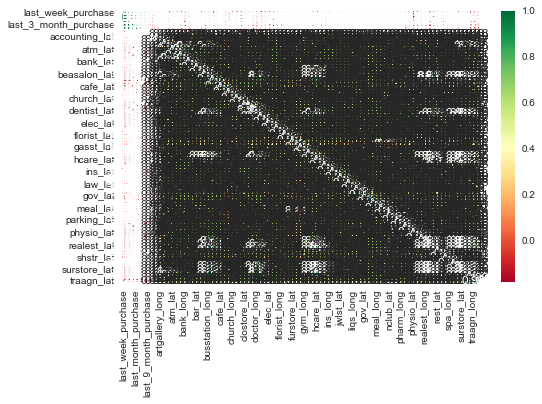

In [1112]:
#Correlation plot
plt.subplots(figsize=(8, 5))
sns.heatmap(final_df_all_cols_training_x.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [1120]:
final_df_all_cols_training_corr = final_df_all_cols_training.corr()
final_df_all_cols_training_corr.head(70)
final_df_all_cols_training_corr.style.apply(lambda x: ["background: green" if v > 0.6 else "" for v in x], axis = 1)


In [1117]:
train_correlation = final_df_all_cols_training_x.corr()
train_correlation.head(70)

,last_week_purchase,last_2_week_purchase,last_3_week_purchase,last_month_purchase,last_3_month_purchase,last_6_month_purchase,last_9_month_purchase,accounting_long,accounting_lat,artgallery_long,...,shstr_long,shstr_lat,spa_long,spa_lat,surstore_long,surstore_lat,transitstation_long,transitstation_lat,traagn_long,traagn_lat
last_week_purchase,1.000000,0.988705,0.986848,0.987817,0.973016,0.957134,0.935242,-0.059414,-0.053148,-0.038614,...,-0.082246,-0.075787,-0.068029,-0.061975,-0.184846,-0.179280,-0.179909,-0.174286,-0.116849,-0.111845
last_2_week_purchase,0.988705,1.000000,0.998009,0.996408,0.984081,0.973603,0.957779,-0.052883,-0.045590,-0.032834,...,-0.075778,-0.068454,-0.061080,-0.054063,-0.179665,-0.173364,-0.174732,-0.168374,-0.110938,-0.104981
last_3_week_purchase,0.986848,0.998009,1.000000,0.998466,0.988747,0.978029,0.962865,-0.052229,-0.044969,-0.031790,...,-0.076033,-0.068887,-0.060595,-0.053579,-0.178547,-0.172246,-0.173622,-0.167264,-0.110343,-0.104411
last_month_purchase,0.987817,0.996408,0.998466,1.000000,0.992569,0.982258,0.967209,-0.053437,-0.046344,-0.032845,...,-0.077003,-0.069999,-0.061998,-0.055225,-0.179983,-0.173798,-0.175075,-0.168835,-0.111756,-0.105982
last_3_month_purchase,0.973016,0.984081,0.988747,0.992569,1.000000,0.995085,0.983574,-0.055517,-0.050043,-0.035899,...,-0.075603,-0.069905,-0.063810,-0.058701,-0.169754,-0.164819,-0.165199,-0.160204,-0.109277,-0.105038
last_6_month_purchase,0.957134,0.973603,0.978029,0.982258,0.995085,1.000000,0.995192,-0.063283,-0.060304,-0.046512,...,-0.080781,-0.077475,-0.070520,-0.067788,-0.166879,-0.164381,-0.162660,-0.160097,-0.110814,-0.108736
last_9_month_purchase,0.935242,0.957779,0.962865,0.967209,0.983574,0.995192,1.000000,-0.064379,-0.062316,-0.049054,...,-0.081293,-0.079034,-0.071088,-0.069230,-0.163322,-0.162029,-0.159321,-0.157961,-0.108624,-0.107336
accounting_long,-0.059414,-0.052883,-0.052229,-0.053437,-0.055517,-0.063283,-0.064379,1.000000,0.993394,0.470390,...,0.484582,0.488372,0.467491,0.470655,0.432064,0.433968,0.430781,0.432708,0.480400,0.482479
accounting_lat,-0.053148,-0.045590,-0.044969,-0.046344,-0.050043,-0.060304,-0.062316,0.993394,1.000000,0.477097,...,0.486249,0.498726,0.472716,0.484514,0.423913,0.436684,0.422946,0.435694,0.478099,0.489937
artgallery_long,-0.038614,-0.032834,-0.031790,-0.032845,-0.035899,-0.046512,-0.049054,0.470390,0.477097,1.000000,...,0.414912,0.426341,0.452135,0.461397,0.350127,0.360651,0.352317,0.362634,0.456931,0.465603


In [964]:
model = LogisticRegression()
rfe = RFE(model, 70)
rfe = rfe.fit(final_df_all_cols_training_x, final_df_all_cols_training_y)
# summarize the selection of the attributes
print('Selected features: %s' % list(final_df_all_cols_training_x.columns[rfe.support_]))

C:\Users\vbhatia\AppData\Local\Continuum\Anaconda6\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Selected features: ['last_week_purchase', 'last_3_week_purchase', 'last_month_purchase', 'last_3_month_purchase', 'accounting_long', 'accounting_lat', 'artgallery_long', 'artgallery_lat', 'atm_lat', 'bank_long', 'bank_lat', 'bar_lat', 'beasalon_long', 'beasalon_lat', 'busstation_lat', 'cafe_long', 'carrep_long', 'carrep_lat', 'church_long', 'church_lat', 'clostore_lat', 'dentist_lat', 'doctor_lat', 'elec_long', 'elec_lat', 'elecstore_lat', 'florist_long', 'florist_lat', 'furstore_long', 'furstore_lat', 'gasst_long', 'gasst_lat', 'gym_long', 'gym_lat', 'hcare_lat', 'hgoodstr_lat', 'ins_long', 'ins_lat', 'jwlst_long', 'jwlst_lat', 'law_lat', 'liqs_long', 'liqs_lat', 'gov_long', 'gov_lat', 'lodg_long', 'lodg_lat', 'meal_long', 'nclub_long', 'nclub_lat', 'parking_long', 'parking_lat', 'pharm_long', 'pharm_lat', 'physio_long', 'physio_lat', 'po_long', 'po_lat', 'realest_lat', 'rest_long', 'rest_lat', 'shstr_long', 'shstr_lat', 'spa_long', 'spa_lat', 'surstore_long', 'surstore_lat', 'transit

In [966]:
#select only columns that have been supported by RFE

x_model = ['last_week_purchase', 'last_3_week_purchase', 'last_month_purchase', 'last_3_month_purchase', 'accounting_long', 'accounting_lat', 'artgallery_long', 'artgallery_lat', 'atm_lat', 'bank_long', 'bank_lat', 'bar_lat', 'beasalon_long', 'beasalon_lat', 'busstation_lat', 'cafe_long', 'carrep_long', 'carrep_lat', 'church_long', 'church_lat', 'clostore_lat', 'dentist_lat', 'doctor_lat', 'elec_long', 'elec_lat', 'elecstore_lat', 'florist_long', 'florist_lat', 'furstore_long', 'furstore_lat', 'gasst_long', 'gasst_lat', 'gym_long', 'gym_lat', 'hcare_lat', 'hgoodstr_lat', 'ins_long', 'ins_lat', 'jwlst_long', 'jwlst_lat', 'law_lat', 'liqs_long', 'liqs_lat', 'gov_long', 'gov_lat', 'lodg_long', 'lodg_lat', 'meal_long', 'nclub_long', 'nclub_lat', 'parking_long', 'parking_lat', 'pharm_long', 'pharm_lat', 'physio_long', 'physio_lat', 'po_long', 'po_lat', 'realest_lat', 'rest_long', 'rest_lat', 'shstr_long', 'shstr_lat', 'spa_long', 'spa_lat', 'surstore_long', 'surstore_lat', 'transitstation_long', 'transitstation_lat', 'traagn_lat']
final_df_all_cols_training_model_x = final_df_all_cols_training[x_model]
final_df_all_cols_training_model_y = final_df_all_cols_training[y]


In [968]:
#Model building
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

X_train, X_test, y_train, y_test = train_test_split(final_df_all_cols_training_model_x, final_df_all_cols_training_model_y, test_size=0.2, random_state=2)


In [979]:
#Fit model and see the results
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
LogisticRegression accuracy is 0.973
LogisticRegression log_loss is 0.320
LogisticRegression auc is 0.967


C:\Users\vbhatia\AppData\Local\Continuum\Anaconda6\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


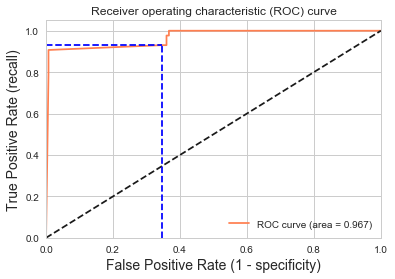

Using a threshold of 0.085 guarantees a sensitivity of 0.930 and a specificity of 0.655, i.e. a false positive rate of 34.53%.


In [976]:
#Plot results

idx = np.min(np.where(tpr > 0.92)) # index of the first threshold for which the sensitivity > 0.92

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))


In [1015]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       139
          1       0.97      0.91      0.94        43

avg / total       0.97      0.97      0.97       182



In [1027]:
#Random Forest Classifier
#X_train, X_test, y_train, y_test
pipeline = Pipeline([
    ('clf', RandomForestClassifier(random_state=42))
])
ncol_sqrt=round(final_df_all_cols_training_model_x.shape[1]**0.5)
parameters = {
    'clf__max_depth': (4,6,8),
    'clf__n_estimators': (30, 60, 100),
    'clf__criterion':('gini','entropy'),
    'clf__max_features': range(5,(ncol_sqrt+1)),
    'clf__class_weight': ({1:0.5,0:0.5},{1:0.6,0:0.4},{1:0.4,0:0.6})}

In [1030]:
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:   48.0s finished
C:\Users\vbhatia\AppData\Local\Continuum\Anaconda6\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'clf__max_depth': (4, 6, 8), 'clf__n_estimators': (30, 60, 100), 'clf__criterion': ('gini', 'entropy'), 'clf__max_features': range(5, 9), 'clf__class_weight': ({1: 0.5, 0: 0.5}, {1: 0.6, 0: 0.4}, {1: 0.4, 0: 0.6})},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [1032]:
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()

Best score: 0.9821428571428571
Best parameters set:


In [1033]:
params = {}
for param_name in sorted(parameters.keys()):
    params[param_name[5:]]=best_parameters[param_name]
    print('\t {}: {}'.format(param_name[5:], best_parameters[param_name]))
params

	 class_weight: {1: 0.5, 0: 0.5}
	 criterion: gini
	 max_depth: 8
	 max_features: 8
	 n_estimators: 100


{'class_weight': {1: 0.5, 0: 0.5},
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 8,
 'n_estimators': 100}

In [1034]:
# Building the model with optimal parameter
rf = RandomForestClassifier(n_estimators = 30,
                            criterion = 'gini',
                            max_features = 'sqrt',
                            max_depth = 6,
                            bootstrap = True,
                            oob_score = True,
                            class_weight = 'balanced_subsample')
rf.fit(X_train, y_train.purch_flag)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=6, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [1037]:
# ROC-AUC on train data
from sklearn.metrics import roc_auc_score
round(float(roc_auc_score(y_train.purch_flag, rf.predict_proba(X_train)[::,1])), 2)

0.99

In [1039]:
# ROC-AUC on test data
round(float(roc_auc_score(y_test.purch_flag, rf.predict_proba(pd.DataFrame(X_test))[::,1])), 2)


0.98

In [1041]:
# Extracting feature importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(60)

from sklearn.feature_selection import SelectFromModel
var_idx = SelectFromModel(rf, threshold = 0.002607, prefit = True).get_support()
var_names = X_train.columns[var_idx]
var_names

Index(['last_week_purchase', 'last_3_week_purchase', 'last_month_purchase',
       'last_3_month_purchase', 'artgallery_long', 'artgallery_lat', 'bar_lat',
       'beasalon_long', 'beasalon_lat', 'busstation_lat', 'cafe_long',
       'carrep_long', 'florist_long', 'furstore_lat', 'gasst_long',
       'hcare_lat', 'jwlst_long', 'meal_long', 'nclub_long', 'nclub_lat',
       'po_long', 'po_lat', 'rest_long', 'shstr_lat', 'surstore_long',
       'surstore_lat', 'transitstation_long', 'transitstation_lat'],
      dtype='object')

In [1055]:
#OOT start date
df_test_sales[df_test_sales['date_colname'] == '10/4/16 17:00']

,Index,date_colname
7082,7083,10/4/16 17:00


In [1056]:
# Oot obs window - 07/14/16 - 4/3/17   perf window 04/04/17 - 05/03/17
# Oot obs index - [5450]   - [10367]   perf window [10386] - [10928]

#Out of Time Data preparation (Different time cohort)
#Performance window total sales calculated
# df_sales_gran['perf_win_sum_oot'] = df_sales_gran[df_sales_gran.columns[10386:10928]].sum(axis = 1)


#Create time based features in the observation window[10367]
#Get indexs for a week , two week, three week , month, 3 months, 6 months and 9 months back
#indexs for a week [10253], two week[10121], three week[9996], month[9813], 3 months[8735], 6 months[7083] and 9 months [5450] back
# df_sales_gran['oot_last_week_purchase'] = df_sales_gran[df_sales_gran.columns[10253:10367]].sum(axis = 1) #last week
# df_sales_gran['oot_last_2_week_purchase'] = df_sales_gran[df_sales_gran.columns[10121:10367]].sum(axis = 1) #last 2 week
# df_sales_gran['oot_last_3_week_purchase'] = df_sales_gran[df_sales_gran.columns[9996:10367]].sum(axis = 1) #last 3 week
# df_sales_gran['oot_last_month_purchase'] = df_sales_gran[df_sales_gran.columns[9813:10367]].sum(axis = 1) #last 1 mth
# df_sales_gran['oot_last_3_month_purchase'] = df_sales_gran[df_sales_gran.columns[8735:10367]].sum(axis = 1) #last 3 mth
# df_sales_gran['oot_last_6_month_purchase'] = df_sales_gran[df_sales_gran.columns[7083:10367]].sum(axis = 1) #last 6 mth
# df_sales_gran['oot_last_9_month_purchase'] = df_sales_gran[df_sales_gran.columns[5450:10367]].sum(axis = 1) #last 9 mth


In [1057]:
# df_sales_gran.head(3)

,store_code,8/3/2015 9:00,8/3/2015 10:00,8/3/2015 11:00,8/3/2015 12:00,8/3/2015 13:00,8/3/2015 14:00,8/3/2015 15:00,8/3/2015 16:00,8/3/2015 17:00,...,last_6_month_purchase,last_9_month_purchase,perf_win_sum_oot,oot_last_week_purchase,oot_last_2_week_purchase,oot_last_3_week_purchase,oot_last_month_purchase,oot_last_3_month_purchase,oot_last_6_month_purchase,oot_last_9_month_purchase
0,10055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1650.0,1650.0,1200.0,270.0,1560.0,1740.0,2250.0,7530.0,14130.0,25950.0
1,10077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,810.0,0.0,90.0,180.0,210.0,600.0,930.0,930.0
2,10079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10830.0,10830.0,20730.0,5580.0,8280.0,11340.0,18690.0,59820.0,131370.0,193740.0


In [1063]:
# df_sales_gran_oot_final = df_sales_gran[['store_code','perf_win_sum_oot','oot_last_week_purchase','oot_last_2_week_purchase','oot_last_3_week_purchase','oot_last_month_purchase','oot_last_3_month_purchase','oot_last_6_month_purchase','oot_last_9_month_purchase']]

In [1064]:
# df_sales_gran_oot_final['purch_flag'] = np.where(df_sales_gran_oot_final.perf_win_sum_oot > 0, 1, 0)

C:\Users\vbhatia\AppData\Local\Continuum\Anaconda6\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1065]:
# df_sales_gran_oot_final = df_sales_gran_oot_final[['store_code','purch_flag','oot_last_week_purchase','oot_last_2_week_purchase','oot_last_3_week_purchase','oot_last_month_purchase','oot_last_3_month_purchase','oot_last_6_month_purchase','oot_last_9_month_purchase']]

In [1068]:
# #Merge the latitude and longitude feature set with this data
# final_df_all_cols_oot = df_sales_gran_oot_final.merge(final_df_all_cols, how ='left',on='store_code')
# final_df_all_cols_oot = final_df_all_cols_oot.fillna(0.000000)
# final_df_all_cols_oot['purch_flag'].value_counts()


1    851
0     59
Name: purch_flag, dtype: int64

In [1085]:
df_test_sales[df_test_sales['date_colname'] == '11/4/15 17:00']

,Index,date_colname
1360,1361,11/4/15 17:00


In [1086]:
# Oot obs window - 11/4/15 - 8/3/16   perf window 8/4/16 - 9/3/16
# Oot obs index - [1361]   - [5977]   perf window [5995] - [6528]

#Out of Time Data preparation (Different time cohort)
#Performance window total sales calculated
df_sales_gran['perf_win_sum_oot'] = df_sales_gran[df_sales_gran.columns[5995:6528]].sum(axis = 1)


#Create time based features in the observation window[10367]
#Get indexs for a week , two week, three week , month, 3 months, 6 months and 9 months back
#indexs for a week [5857], two week[5736], three week[5610], month[5450], 3 months[4369], 6 months[2861] and 9 months [1361] back
df_sales_gran['oot_last_week_purchase'] = df_sales_gran[df_sales_gran.columns[5857:5977]].sum(axis = 1) #last week
df_sales_gran['oot_last_2_week_purchase'] = df_sales_gran[df_sales_gran.columns[5736:5977]].sum(axis = 1) #last 2 week
df_sales_gran['oot_last_3_week_purchase'] = df_sales_gran[df_sales_gran.columns[5610:5977]].sum(axis = 1) #last 3 week
df_sales_gran['oot_last_month_purchase'] = df_sales_gran[df_sales_gran.columns[5450:5977]].sum(axis = 1) #last 1 mth
df_sales_gran['oot_last_3_month_purchase'] = df_sales_gran[df_sales_gran.columns[4369:5977]].sum(axis = 1) #last 3 mth
df_sales_gran['oot_last_6_month_purchase'] = df_sales_gran[df_sales_gran.columns[2861:5977]].sum(axis = 1) #last 6 mth
df_sales_gran['oot_last_9_month_purchase'] = df_sales_gran[df_sales_gran.columns[1361:5977]].sum(axis = 1) #last 9 mth


In [1087]:
df_sales_gran_oot_final = df_sales_gran[['store_code','perf_win_sum_oot','oot_last_week_purchase','oot_last_2_week_purchase','oot_last_3_week_purchase','oot_last_month_purchase','oot_last_3_month_purchase','oot_last_6_month_purchase','oot_last_9_month_purchase']]

In [1088]:
df_sales_gran_oot_final['purch_flag'] = np.where(df_sales_gran_oot_final.perf_win_sum_oot > 0, 1, 0)

C:\Users\vbhatia\AppData\Local\Continuum\Anaconda6\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1089]:
df_sales_gran_oot_final['purch_flag'].value_counts()


0    638
1    268
Name: purch_flag, dtype: int64

In [1090]:
final_df_all_cols_oot = df_sales_gran_oot_final.merge(final_df_all_cols, how ='left',on='store_code')
final_df_all_cols_oot = final_df_all_cols_oot.fillna(0.000000)

In [1095]:
#Rename columns (as model parameter error will come otherwise)
final_df_all_cols_oot = final_df_all_cols_oot.rename(columns={'oot_last_week_purchase': 'last_week_purchase', 
                                                               'oot_last_2_week_purchase': 'last_2_week_purchase',
                                                             'oot_last_3_week_purchase': 'last_3_week_purchase',
                                                             'oot_last_month_purchase': 'last_month_purchase',
                                                             'oot_last_3_month_purchase': 'last_3_month_purchase',
                                                             'oot_last_6_month_purchase': 'last_6_month_purchase',
                                                             'oot_last_9_month_purchase': 'last_9_month_purchase'})



In [1104]:
y=['purch_flag']
final_df_all_cols_oot_x = final_df_all_cols_oot[x_model]
final_df_all_cols_oot_y = final_df_all_cols_oot[y]


In [1106]:
#Split the data again

X_oot_train, X_oot_test, y_oot_train, y_oot_test = train_test_split(final_df_all_cols_oot_x, final_df_all_cols_oot_y, test_size=1, random_state=2)


In [1110]:

# ROC-AUC on test data (Random Forest)
round(float(roc_auc_score(y_oot_train.purch_flag, rf.predict_proba(pd.DataFrame(X_oot_train))[::,1])), 2)

0.96

In [1111]:
#Fit model and see the results Logistic Regression on OOT
#logreg = LogisticRegression()
#model = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_oot_train)
y_pred_proba = logreg.predict_proba(X_oot_train)[:, 1]
[fpr, tpr, thr] = roc_curve(y_oot_train, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_oot_train, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_oot_train, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
LogisticRegression accuracy is 0.972
LogisticRegression log_loss is 0.383
LogisticRegression auc is 0.961


In [1125]:
#Clustering based on the important features from random forest
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(final_df_all_cols_training_model_x)
    wcss.append(kmeans.inertia_) # within-cluster sums of squares (WCSS) to support our decision of number of clusters

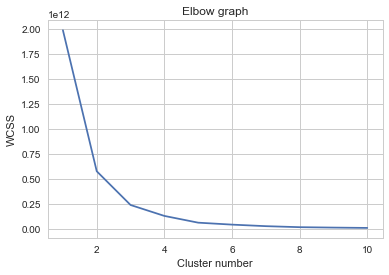

In [1126]:
#Elbow method to decide the optimal numbers of clusters
plt.plot(range(1,11), wcss)
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS') 
plt.show()

In [1127]:
#Optimal number of clusters 4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(final_df_all_cols_training_model_x)

In [1129]:
final_df_all_cols_training_model_x['clusters'] = clusters
final_df_all_cols_training_model_x.head()

C:\Users\vbhatia\AppData\Local\Continuum\Anaconda6\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,last_week_purchase,last_3_week_purchase,last_month_purchase,last_3_month_purchase,accounting_long,accounting_lat,artgallery_long,artgallery_lat,atm_lat,bank_long,...,shstr_long,shstr_lat,spa_long,spa_lat,surstore_long,surstore_lat,transitstation_long,transitstation_lat,traagn_lat,clusters
0,450.0,1080.0,1290.0,1650.0,6.192794,46.194949,6.195039,46.194393,46.194382,6.194222,...,0.000000,0.000000,6.194315,46.194314,6.194537,46.195762,6.193644,46.196488,46.196591,0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.200046,46.204263,6.199455,46.204689,0.000000,0
2,2430.0,6240.0,8790.0,10830.0,6.635920,46.779259,0.000000,0.000000,46.780985,6.636304,...,6.636417,46.780796,6.636416,46.781540,6.636434,46.780979,6.635567,46.781713,46.780527,0
3,3180.0,8250.0,11400.0,13140.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [1130]:
final_df_all_cols_training_model_x['clusters'].value_counts()

0    869
2     34
1      6
3      1
Name: clusters, dtype: int64

In [ ]:
#4 cluster centres based on the 70 features 
kmeans.cluster_centers_

In [1155]:
#Kmeans based on the transit station longitude and latitude - 2 features
xkmeans = ['transitstation_long' ,'transitstation_lat']
final_df_all_cols_training_model_kmeans = final_df_all_cols_training[xkmeans]

In [1166]:
#Clustering based on the 2 features
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(final_df_all_cols_training_model_kmeans)
    wcss.append(kmeans.inertia_) # within-cluster sums of squares (WCSS) to support our decision of number of clusters

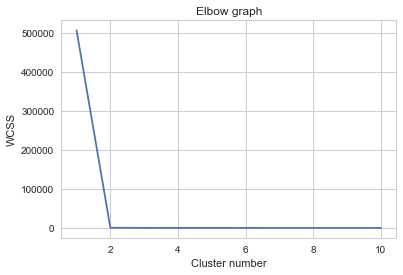

In [1167]:
#Elbow method to decide the optimal numbers of clusters
plt.plot(range(1,11), wcss)
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS') 
plt.show()

In [1173]:
#Optimal number of clusters 4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(final_df_all_cols_training_model_kmeans)

In [1174]:
final_df_all_cols_training_kmeans = final_df_all_cols_training
final_df_all_cols_training_kmeans['clusters'] = clusters
final_df_all_cols_training_kmeans.head()

,store_code,purch_flag,last_week_purchase,last_2_week_purchase,last_3_week_purchase,last_month_purchase,last_3_month_purchase,last_6_month_purchase,last_9_month_purchase,accounting_long,...,shstr_lat,spa_long,spa_lat,surstore_long,surstore_lat,transitstation_long,transitstation_lat,traagn_long,traagn_lat,clusters
0,10055,1,450.0,510.0,1080.0,1290.0,1650.0,1650.0,1650.0,6.192794,...,0.000000,6.194315,46.194314,6.194537,46.195762,6.193644,46.196488,6.192838,46.196591,3
1,10077,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,6.200046,46.204263,6.199455,46.204689,0.000000,0.000000,3
2,10079,1,2430.0,4740.0,6240.0,8790.0,10830.0,10830.0,10830.0,6.635920,...,46.780796,6.636416,46.781540,6.636434,46.780979,6.635567,46.781713,6.636876,46.780527,3
3,10081,1,3180.0,5430.0,8250.0,11400.0,13140.0,13140.0,13140.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,10085,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [1175]:
final_df_all_cols_training_kmeans['clusters'].value_counts()

0    387
2    253
1    175
3     95
Name: clusters, dtype: int64

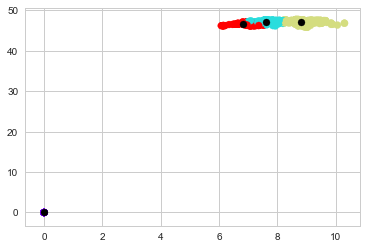

In [1182]:
plt.scatter(final_df_all_cols_training_kmeans.transitstation_long, final_df_all_cols_training_kmeans.transitstation_lat, c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')  

In [1177]:
kmeans.cluster_centers_

array([[4.26325641e-14, 1.06581410e-13],
       [7.61808060e+00, 4.71690229e+01],
       [8.80133522e+00, 4.71378483e+01],
       [6.81627761e+00, 4.65216868e+01]])